# Data Visualization Metamorphosis

### [Ethereum Fraud Detection Dataset](https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset)

--------------

### Sepand Haghighi - Farzad Ramezani

### September 2022

--------------

### Cleaning

We performed a very limited cleaning step for this dataset and only removed columns with zero variance.
These columns are:
1. ....
2. ....

The cleaned dataset is stored in file `1.csv`

### Loading

In [1]:
import sys
try:
  import google.colab
  !{sys.executable} -m pip -q -q install pandas>=0.24.2
  !{sys.executable} -m pip -q -q install matplotlib>=3.0.3
  !{sys.executable} -m pip -q -q install seaborn>=0.9.1
  !{sys.executable} -m pip -q -q install numpy>=1.18.5
except:
  pass

In [2]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv(os.path.join("Data", "1.csv"))

### Statistics and Distribution 

#### Overall Statistics

In [3]:
df.columns

Index(['Address', 'FLAG', 'Avg_min_between_received_tnx',
       'Avg_min_between_sent_tnx', 'Time_Diff_between_first_and_last_Mins',
       'Sent_tnx', 'Received_Tnx', 'Number_of_Created_Contracts',
       'Average_of_Unique_Received_From_Addresses',
       'Average_of_Unique_Sent_To_Addresses', 'min_value_received',
       'max_value_received ', 'avg_val_received', 'min_val_sent',
       'max_val_sent', 'avg_val_sent',
       'total_transactions_including_tnx_to_create_contract',
       'total_Ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance', 'Total_ERC20_tnxs',
       'ERC20_total_Ether_received', 'ERC20_total_ether_sent',
       'ERC20_total_Ether_sent_contract', 'ERC20_uniq_sent_addr',
       'ERC20_uniq_rec_addr', 'ERC20_uniq_sent_addr_1',
       'ERC20_uniq_rec_contract_addr', 'ERC20_min_val_rec',
       'ERC20_max_val_rec', 'ERC20_avg_val_rec', 'ERC20_min_val_sent',
       'ERC20_max_val_sent', 'ERC20_avg_val_sent',
       'ERC20_u

In [4]:
len(df.columns)

39

In [5]:
df.describe()

,FLAG,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Time_Diff_between_first_and_last_Mins,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_sent_contracts,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_sent_addr_1,ERC20_uniq_rec_contract_addr,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name
count,9816.000000,9816.000000,9816.000000,9.816000e+03,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9816.000000,9.816000e+03,9.816000e+03,9816.0,9.816000e+03,8987.000000,8.987000e+03,8.987000e+03,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8987.000000,8.987000e+03,8.987000e+03,8.987000e+03,8.987000e+03,8.987000e+03,8987.000000,8987.000000
mean,0.221985,7999.484930,5079.449775,2.181872e+05,116.148024,164.034332,3.739099,30.424104,25.885086,43.815895,524.036695,100.702932,4.809714,314.601343,44.631948,283.921455,1.018513e+04,1.166624e+04,0.0,1.481105e+03,36.313675,1.299801e+08,1.390455e+07,111.247691,5.650606,7.604985,0.003449,4.897185,486.896950,1.256001e+08,4.358265e+06,1.177390e+04,1.307023e+07,6.335943e+06,1.382107,4.822188
std,0.415602,23074.485991,21485.935325,3.228664e+05,758.155374,942.004171,141.625485,298.998043,264.151587,326.252165,13025.351910,2888.642723,138.785921,6637.566787,239.187359,1354.058518,3.587784e+05,3.646679e+05,0.0,2.427340e+05,448.139029,1.055323e+10,1.182031e+09,6137.146721,105.398337,81.929074,0.065789,17.244581,16906.729265,1.055205e+10,2.144168e+08,1.055031e+06,1.181545e+09,5.922985e+08,6.722984,16.676068
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.170200e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.424673,0.000000,0.163902,0.086103,4.000000,2.259862e-01,2.668812e+00,0.0,6.200000e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,509.255000,17.335000,4.656981e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095053,6.000000,1.727367,0.049209,4.999380,1.605512,8.000000,1.246589e+01,3.049397e+01,0.0,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
75%,0.000000,5480.845000,561.037500,3.035992e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,66.995778,22.000000,0.998800,61.406769,21.999380,54.000000,1.009990e+02,1.010000e+02,0.0,4.452000e-02,3.000000,1.000089e+02,0.000000e+00,0.000000,0.000000,2.000000,0.000000,2.000000,0.004388,9.900000e+01,2.849149e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.000000
max,1.000000,482175.490000,430287.670000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,800000.000000,283618.831600,12000.000000,520000.000000,12000.000000,19995.000000,2.858096e+07,2.858159e+07,0.0,1.428864e+07,10001.000000,1.000020e+12,1.120000e+11,416000.000000,6582.000000,4293.000000,3.000000,782.000000,990000.000000,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,213.000000,737.00

#### Most Received Token Type (Fraud)

In [6]:
positive_sample = df[(df["FLAG"]==1)]
negative_sample = df[(df["FLAG"]==0)]
token_rec_p = df[(df["FLAG"]==1) & (df.iloc[:,-1]!="0")].iloc[:,-1].value_counts()
token_rec_n = df[(df["FLAG"]==0) & (df.iloc[:,-1]!="0")].iloc[:,-1].value_counts()
token_rec_p.name = ""
token_rec_n.name = ""

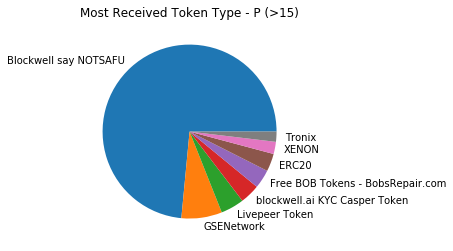

In [7]:
_ = token_rec_p[token_rec_p>15].plot(kind='pie', title="Most Received Token Type - P (>15)")

⚠️ `Blockwell say NOTSAFU` is clearly used more in fraudulent transactions

#### Most Recevied Token Type (Non-Fraud)

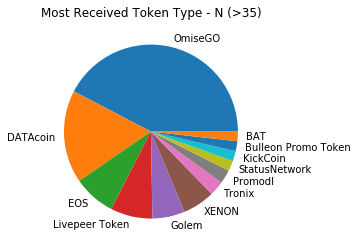

In [8]:
_ = token_rec_n[token_rec_n>35].plot(kind='pie', title="Most Received Token Type - N (>35)")

#### Most Sent Token Type (Fraud)

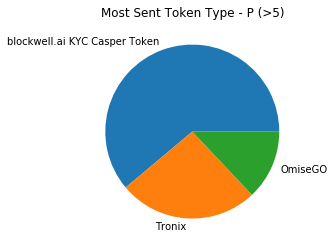

In [9]:
token_sent_p = df[(df["FLAG"]==1) & (df.iloc[:,-2]!="0") & (df.iloc[:,-2]!="None")].iloc[:,-2].value_counts()
token_sent_n = df[(df["FLAG"]==0) & (df.iloc[:,-2]!="0") & (df.iloc[:,-2]!="None")].iloc[:,-2].value_counts()
token_sent_p.name = ""
token_sent_n.name = ""
_ = token_sent_p[token_sent_p>5].plot(kind='pie', title="Most Sent Token Type - P (>5)")

⚠️ `Blockwell Casper Token` is clearly used more in fraudulent transactions

#### Most Sent Token Type (Non-Fraud)

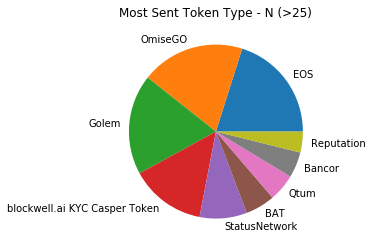

In [10]:
_ = token_sent_n[token_sent_n>25].plot(kind='pie', title="Most Sent Token Type - N (>25)")

#### Overall Distribution

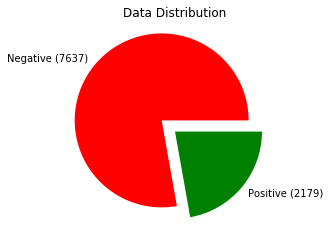

In [11]:
dist = df["FLAG"].value_counts()

_ = plt.pie(dist, labels = ["Negative ({0})".format(len(negative_sample)), "Positive ({0})".format(len(positive_sample))], colors = ["r", "g"], explode=[0.2, 0])
_ = plt.title("Data Distribution")

⚠️ Dataset is imbalanced

### Comparing Different Features

In [12]:
df.replace("0", np.nan, inplace=True)
columns = df.columns[1:-4]
positive_sample = df[df["FLAG"]==1]
negative_sample  = df[df["FLAG"]==0].sample(n = len(positive_sample), replace = False)
median_positive = positive_sample[columns].median(skipna=True).round(3)
median_negative = negative_sample[columns].median(skipna=True).round(3)
q25_positive = positive_sample[columns].quantile(q=0.25).round(3)
q25_negative = negative_sample[columns].quantile(q=0.25).round(3)
q75_positive = positive_sample[columns].quantile(q=0.75).round(3)
q75_negative = negative_sample[columns].quantile(q=0.75).round(3)
mean_positive = positive_sample[columns].mean(skipna=True).round(3)
mean_negative = negative_sample[columns].mean(skipna=True).round(3)

def autolabel(ax, rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


def plot_bar(col):
    x = ["Positive", "Negative"]
    data_list = [[mean_positive[col], mean_negative[col]], [median_positive[col], median_negative[col]], [q25_positive[col], q25_negative[col]], [q75_positive[col], q75_negative[col]]]
    titles_list = ["Mean | Ratio(P/N):{0}% | Diff(ABS): {1}", "Median | Ratio(P/N):{0}% | Diff(ABS): {1}", "Quantile 0.25 | Ratio(P/N):{0}% | Diff(ABS): {1}", "Quantile 0.75 | Ratio(P/N):{0}% | Diff(ABS): {1}"]
    colors_list = ["b", "g", "y", "r"]
    for index, item in enumerate(data_list):
        ax = plt.subplot(3,2,index + 1)
        rects = ax.bar(x, item, width=0.4, color=colors_list[index])
        autolabel(ax, rects)
        ax.set_ylim([0, 1.2 * max(item)])
        ax.set_title(titles_list[index].format(round(item[0]/item[1] * 100, 1), round(item[0] - item[1], 1)))
    #plt.suptitle(" ".join(col.split("_")).capitalize())
    plt.tight_layout()
    plt.subplots_adjust(right=2, top=4)
    plt.show()

#### Average Min Between Received Transactions

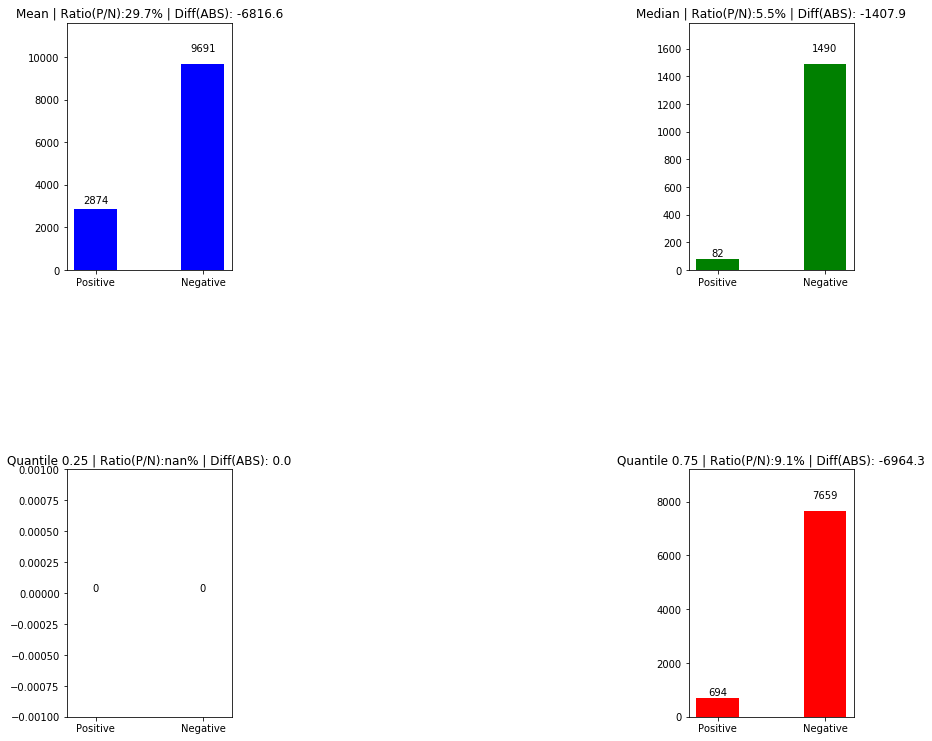

In [13]:
plot_bar("Avg_min_between_received_tnx")

⚠️ We can see that `Average Min Between Received Transactions` is significantly higher in `Non-Fraud` transactions

#### Received Transactions 

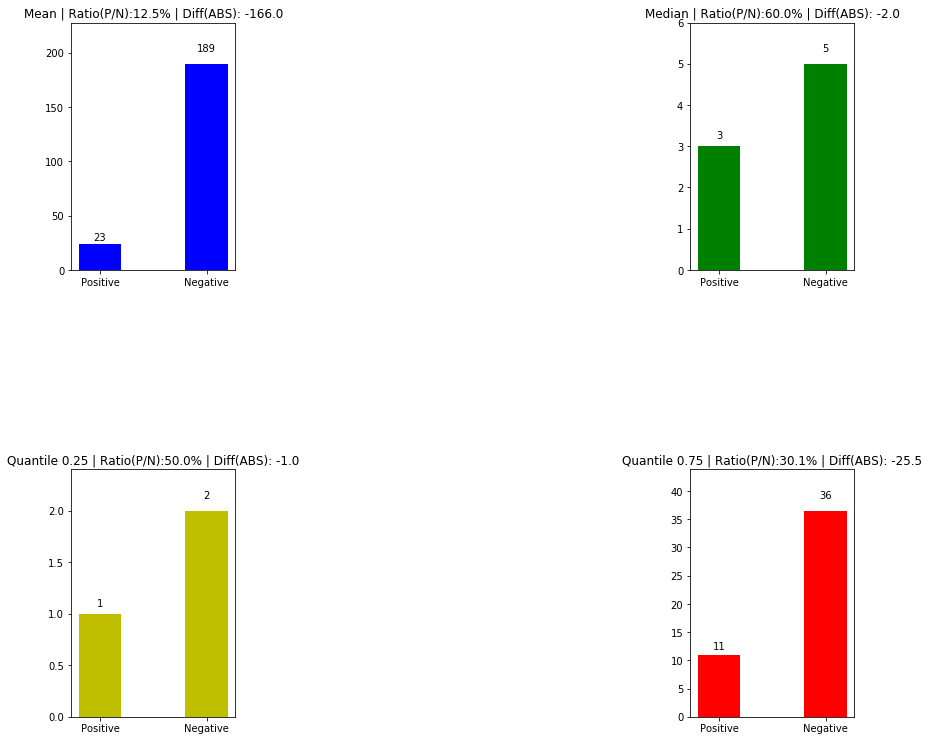

In [14]:
plot_bar("Received_Tnx")

⚠️ We can see that `Received Transactions` is significantly higher in `Non-Fraud` transactions

#### Sent Transactions

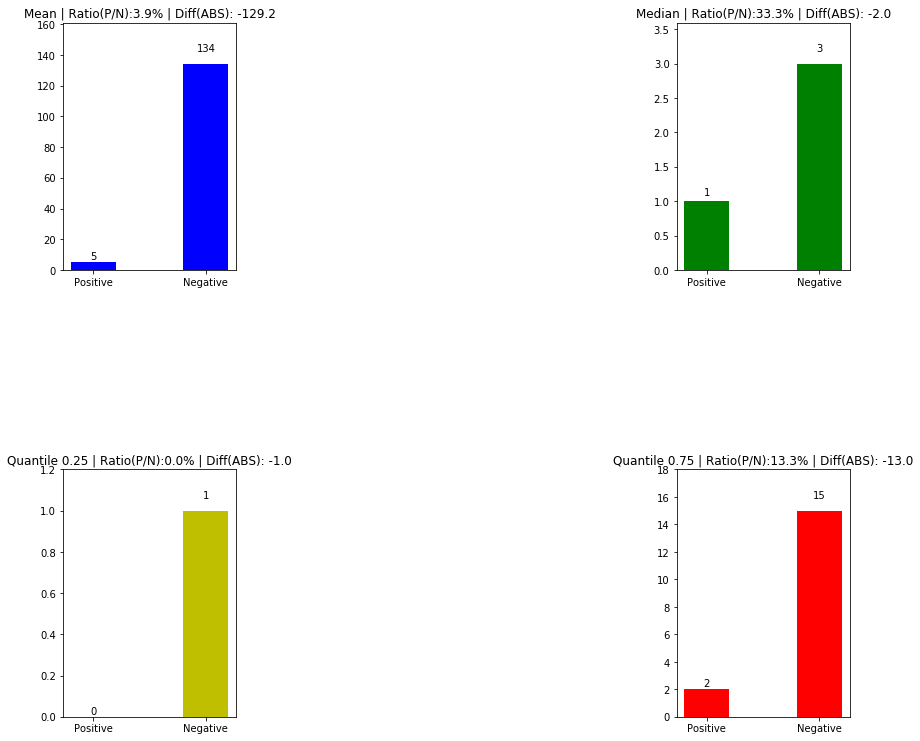

In [15]:
plot_bar("Sent_tnx")

⚠️ We can see that `Sent Transactions` is significantly higher in `Non-Fraud` transactions

#### Average of Unique Sent to Addresses

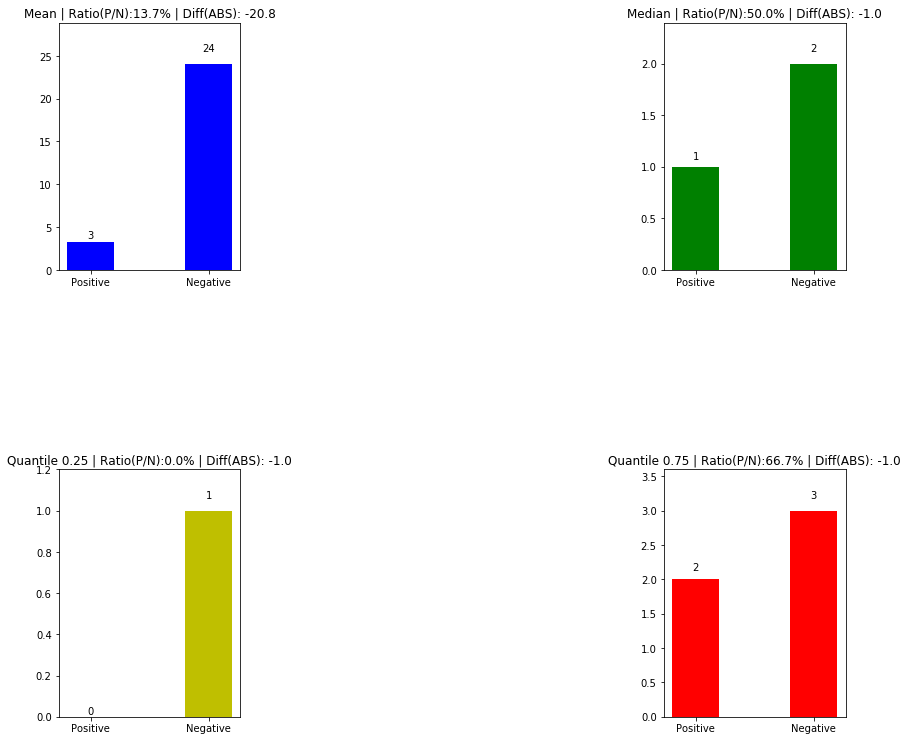

In [16]:
plot_bar("Average_of_Unique_Sent_To_Addresses")

⚠️ We can see that `Average of Unique Sent to Addresses` is significantly higher in `Non-Fraud` transactions

### Correlation Between Features

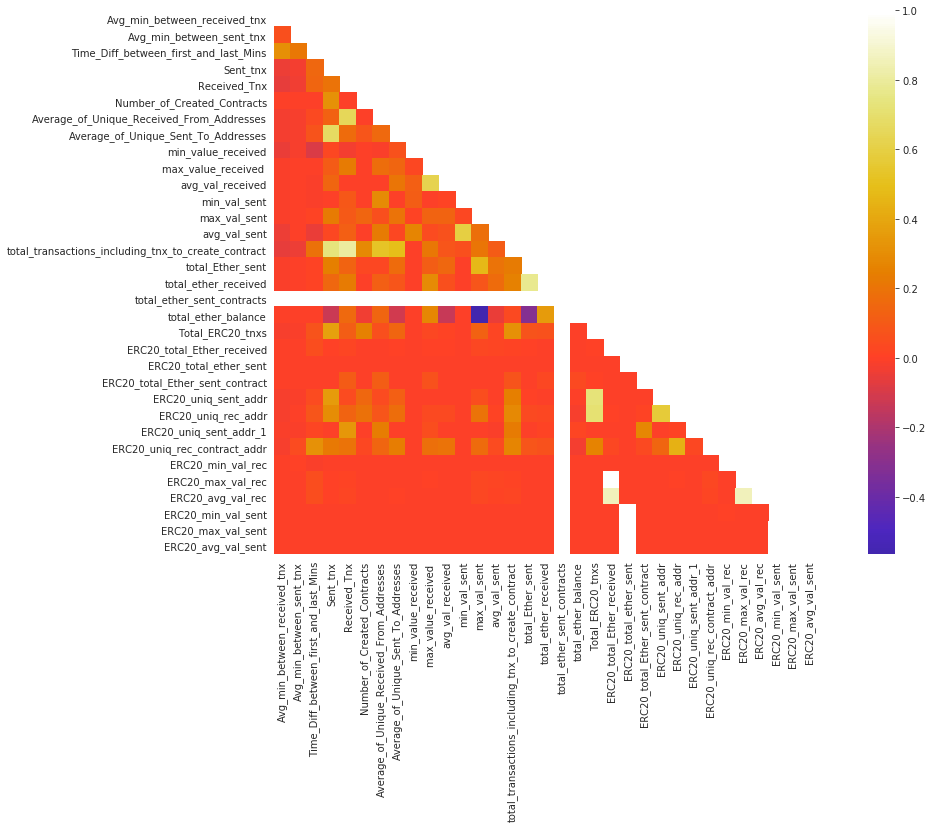

In [17]:
df = df.iloc[:,2:-4]
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

### Features Distribution

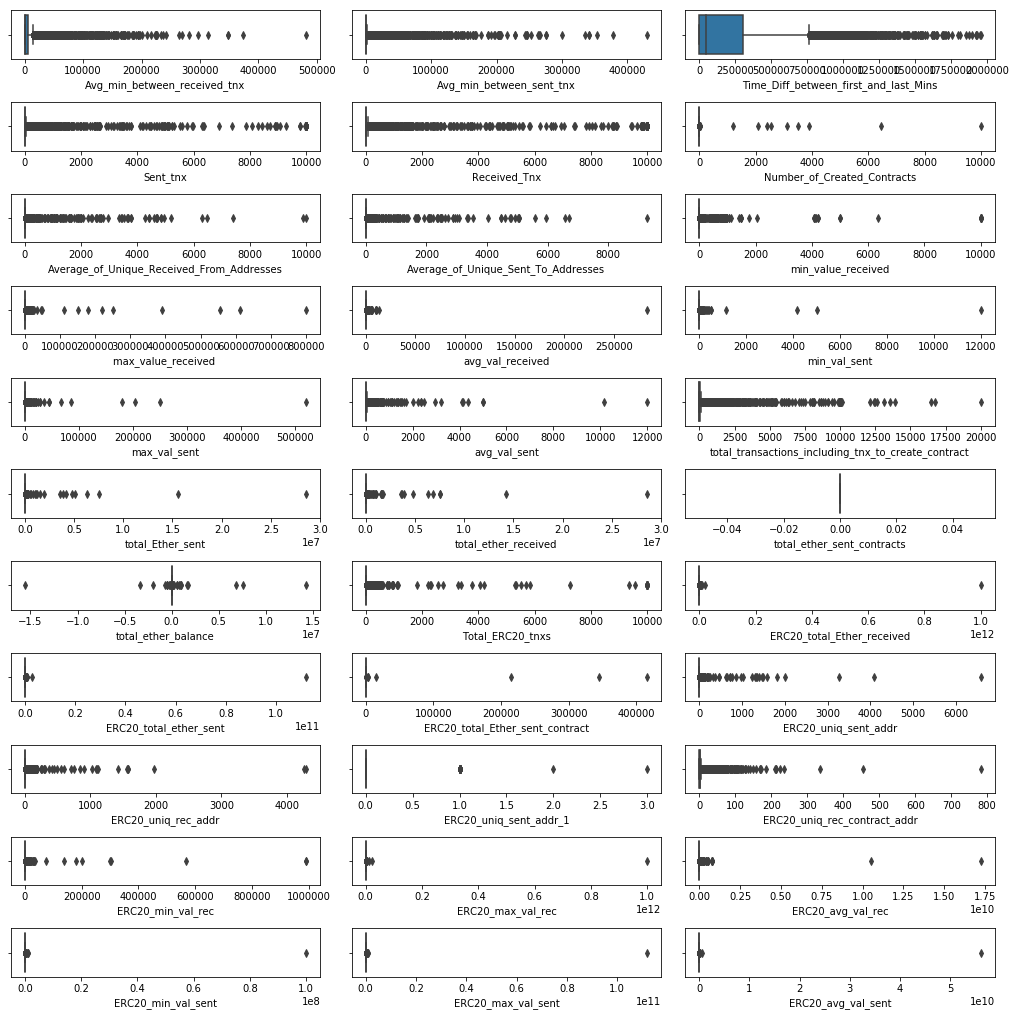

In [18]:
plot_col = 3
plot_row = math.ceil(len(df.columns) / plot_col)
fig, axes = plt.subplots(plot_row, plot_col, figsize=(14, 14), constrained_layout =True)
row = 0
col = 0
for i in range(len(df.columns)):
    sns.boxplot(ax = axes[row,col], data=df, x=df.columns[i])
    col += 1
    if col == 3:
        col = 0
        row += 1